In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
data=pd.read_csv("balanced_cinnamon_quality_dataset.csv")
data

,Sample_ID,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg),Quality_Label
0,H001,10.56,5.93,1.24,0.28,0.0019,0.0021,High
1,H002,11.43,5.60,1.35,0.25,0.0016,0.0039,High
2,H003,11.10,5.70,1.21,0.37,0.0013,0.0029,High
3,H004,10.90,5.76,1.47,0.27,0.0011,0.0035,High
4,H005,10.23,5.82,1.28,0.26,0.0013,0.0047,High
5,H006,10.23,6.05,1.40,0.31,0.0013,0.0027,High
6,H007,10.09,5.64,1.29,0.23,0.0017,0.0032,High
7,H008,11.30,5.86,1.36,0.36,0.0016,0.0043,High
8,H009,10.90,5.91,1.36,0.21,0.0019,0.0027,High
9,H010,11.06,5.53,1.26,0.40,0.0015,0.0022,High


In [3]:
data.dtypes

Sample_ID                  object
Moisture (%)              float64
Ash (%)                   float64
Volatile_Oil (%)          float64
Acid_Insoluble_Ash (%)    float64
Chromium (mg/kg)          float64
Coumarin (mg/kg)          float64
Quality_Label              object
dtype: object

In [33]:
data.isnull().sum()

Sample_ID                 0
Moisture (%)              0
Ash (%)                   0
Volatile_Oil (%)          0
Acid_Insoluble_Ash (%)    0
Chromium (mg/kg)          0
Coumarin (mg/kg)          0
Quality_Label             0
dtype: int64

In [4]:
b=set(data['Quality_Label'])
qual=dict()
for s,i in enumerate(b):
    qual.update({i:s})
qual

{'High': 0, 'Low': 1, 'Medium': 2}

In [5]:
data.replace(qual,inplace=True)
data

C:\Users\abdol\AppData\Local\Temp\ipykernel_5848\3520885050.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(qual,inplace=True)


,Sample_ID,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg),Quality_Label
0,H001,10.56,5.93,1.24,0.28,0.0019,0.0021,0
1,H002,11.43,5.60,1.35,0.25,0.0016,0.0039,0
2,H003,11.10,5.70,1.21,0.37,0.0013,0.0029,0
3,H004,10.90,5.76,1.47,0.27,0.0011,0.0035,0
4,H005,10.23,5.82,1.28,0.26,0.0013,0.0047,0
5,H006,10.23,6.05,1.40,0.31,0.0013,0.0027,0
6,H007,10.09,5.64,1.29,0.23,0.0017,0.0032,0
7,H008,11.30,5.86,1.36,0.36,0.0016,0.0043,0
8,H009,10.90,5.91,1.36,0.21,0.0019,0.0027,0
9,H010,11.06,5.53,1.26,0.40,0.0015,0.0022,0


In [6]:
data.rename(index=data['Sample_ID'],inplace=True)
data

,Sample_ID,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg),Quality_Label
H001,H001,10.56,5.93,1.24,0.28,0.0019,0.0021,0
H002,H002,11.43,5.60,1.35,0.25,0.0016,0.0039,0
H003,H003,11.10,5.70,1.21,0.37,0.0013,0.0029,0
H004,H004,10.90,5.76,1.47,0.27,0.0011,0.0035,0
H005,H005,10.23,5.82,1.28,0.26,0.0013,0.0047,0
H006,H006,10.23,6.05,1.40,0.31,0.0013,0.0027,0
H007,H007,10.09,5.64,1.29,0.23,0.0017,0.0032,0
H008,H008,11.30,5.86,1.36,0.36,0.0016,0.0043,0
H009,H009,10.90,5.91,1.36,0.21,0.0019,0.0027,0
H010,H010,11.06,5.53,1.26,0.40,0.0015,0.0022,0


In [7]:

data.drop(columns=['Sample_ID'],inplace=True)
data

,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg),Quality_Label
H001,10.56,5.93,1.24,0.28,0.0019,0.0021,0
H002,11.43,5.60,1.35,0.25,0.0016,0.0039,0
H003,11.10,5.70,1.21,0.37,0.0013,0.0029,0
H004,10.90,5.76,1.47,0.27,0.0011,0.0035,0
H005,10.23,5.82,1.28,0.26,0.0013,0.0047,0
H006,10.23,6.05,1.40,0.31,0.0013,0.0027,0
H007,10.09,5.64,1.29,0.23,0.0017,0.0032,0
H008,11.30,5.86,1.36,0.36,0.0016,0.0043,0
H009,10.90,5.91,1.36,0.21,0.0019,0.0027,0
H010,11.06,5.53,1.26,0.40,0.0015,0.0022,0


In [47]:
data.duplicated().sum()

0

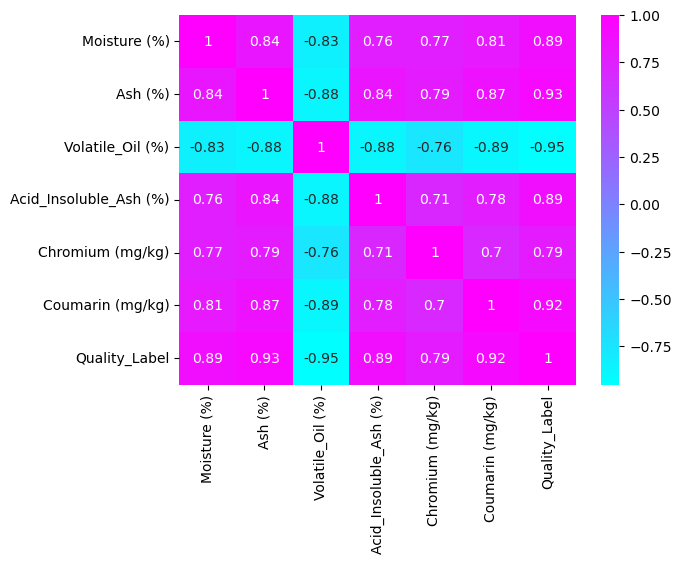

In [31]:

data1=data.corr()

sb.heatmap(data1,annot=True,cmap='cool')
plt.show()

In [32]:

group_rotobat_up10=data[data["Moisture (%)"]>10]
group_rotobat_down10=data[data["Moisture (%)"]<10]
t,val=stats.ttest_ind(group_rotobat_up10['Quality_Label'],group_rotobat_down10['Quality_Label'],equal_var=False)
if val<0.05:
    print('معنادار')
else:
    print('معناندارد')

معناندارد


In [33]:

group_quality_high=data[data["Quality_Label"]==0]
group_quality_low=data[data["Quality_Label"]==1]
t,val=stats.ttest_ind(group_quality_high['Volatile_Oil (%)'],group_quality_low['Volatile_Oil (%)'],equal_var=False)
if val<0.05:
    print('معنادار')
else:
    print('معناندارد')

معنادار


In [11]:
data.rename(columns={'Moisture (%)':'Moisture','Volatile_Oil (%)':'Volatile_Oil','Ash (%)':'Ash','Acid_Insoluble_Ash (%)':'Acid_Insoluble_Ash'},inplace=True)
data

,Moisture,Ash,Volatile_Oil,Acid_Insoluble_Ash,Chromium (mg/kg),Coumarin (mg/kg),Quality_Label
H001,10.56,5.93,1.24,0.28,0.0019,0.0021,0
H002,11.43,5.60,1.35,0.25,0.0016,0.0039,0
H003,11.10,5.70,1.21,0.37,0.0013,0.0029,0
H004,10.90,5.76,1.47,0.27,0.0011,0.0035,0
H005,10.23,5.82,1.28,0.26,0.0013,0.0047,0
H006,10.23,6.05,1.40,0.31,0.0013,0.0027,0
H007,10.09,5.64,1.29,0.23,0.0017,0.0032,0
H008,11.30,5.86,1.36,0.36,0.0016,0.0043,0
H009,10.90,5.91,1.36,0.21,0.0019,0.0027,0
H010,11.06,5.53,1.26,0.40,0.0015,0.0022,0


In [9]:
x=data['Coumarin (mg/kg)'].max() 
x

0.0194

In [12]:
data.describe()

,Moisture,Ash,Volatile_Oil,Acid_Insoluble_Ash,Chromium (mg/kg),Coumarin (mg/kg),Quality_Label
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,11.883500,6.514500,1.050833,0.450500,0.002188,0.008837,1.000000
std,1.171428,0.637124,0.272585,0.161816,0.000739,0.004963,0.823387
min,10.030000,5.530000,0.610000,0.200000,0.001000,0.002100,0.000000
25%,11.047500,5.967500,0.777500,0.347500,0.001600,0.004400,0.000000
50%,11.635000,6.395000,1.090000,0.430000,0.002050,0.008450,1.000000
75%,12.657500,7.160000,1.260000,0.557500,0.002625,0.012275,2.000000
max,13.930000,7.490000,1.490000,0.790000,0.003900,0.019400,2.000000


In [13]:
data.isnull()

,Moisture,Ash,Volatile_Oil,Acid_Insoluble_Ash,Chromium (mg/kg),Coumarin (mg/kg),Quality_Label
H001,False,False,False,False,False,False,False
H002,False,False,False,False,False,False,False
H003,False,False,False,False,False,False,False
H004,False,False,False,False,False,False,False
H005,False,False,False,False,False,False,False
H006,False,False,False,False,False,False,False
H007,False,False,False,False,False,False,False
H008,False,False,False,False,False,False,False
H009,False,False,False,False,False,False,False
H010,False,False,False,False,False,False,False


In [14]:
numeric_cols = ['Moisture', 'Ash', 'Volatile_Oil', 
               'Acid_Insoluble_Ash', 'Chromium (mg/kg)', 'Coumarin (mg/kg)']

data[numeric_cols] = data[numeric_cols].replace(False, 0)
data_cleaned = data[(data[numeric_cols] != 0).all(axis=1)]
data_cleaned

,Moisture,Ash,Volatile_Oil,Acid_Insoluble_Ash,Chromium (mg/kg),Coumarin (mg/kg),Quality_Label
H001,10.56,5.93,1.24,0.28,0.0019,0.0021,0
H002,11.43,5.60,1.35,0.25,0.0016,0.0039,0
H003,11.10,5.70,1.21,0.37,0.0013,0.0029,0
H004,10.90,5.76,1.47,0.27,0.0011,0.0035,0
H005,10.23,5.82,1.28,0.26,0.0013,0.0047,0
H006,10.23,6.05,1.40,0.31,0.0013,0.0027,0
H007,10.09,5.64,1.29,0.23,0.0017,0.0032,0
H008,11.30,5.86,1.36,0.36,0.0016,0.0043,0
H009,10.90,5.91,1.36,0.21,0.0019,0.0027,0
H010,11.06,5.53,1.26,0.40,0.0015,0.0022,0


<Axes: xlabel='Acid_Insoluble_Ash', ylabel='Ash'>

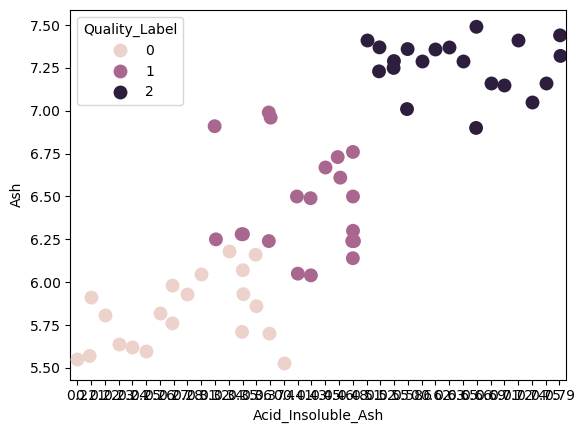

In [45]:
sb.stripplot(x='Acid_Insoluble_Ash',y='Ash',data=data,size=10,hue='Quality_Label')

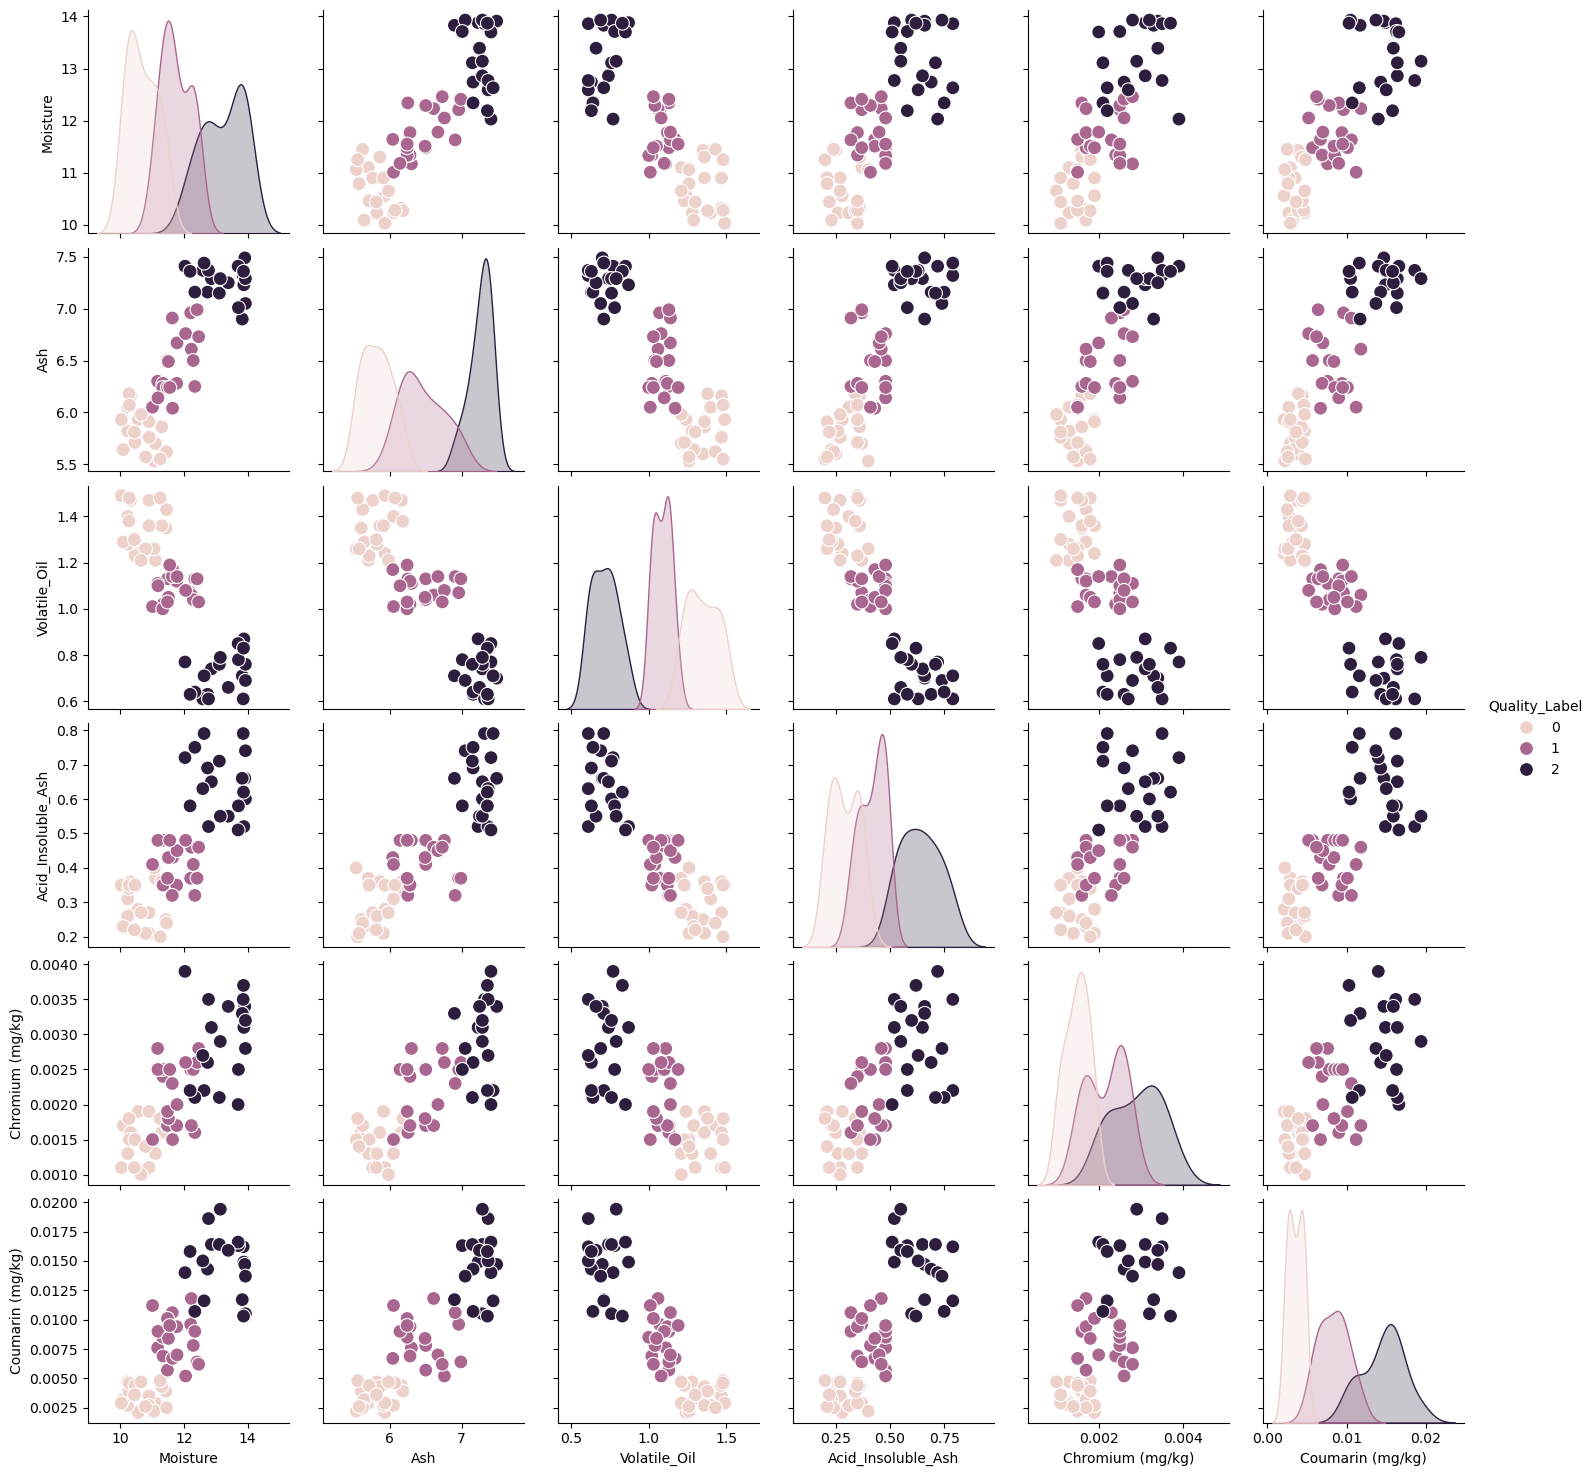

In [43]:
sb.pairplot(data,hue='Quality_Label',plot_kws={'s':100})

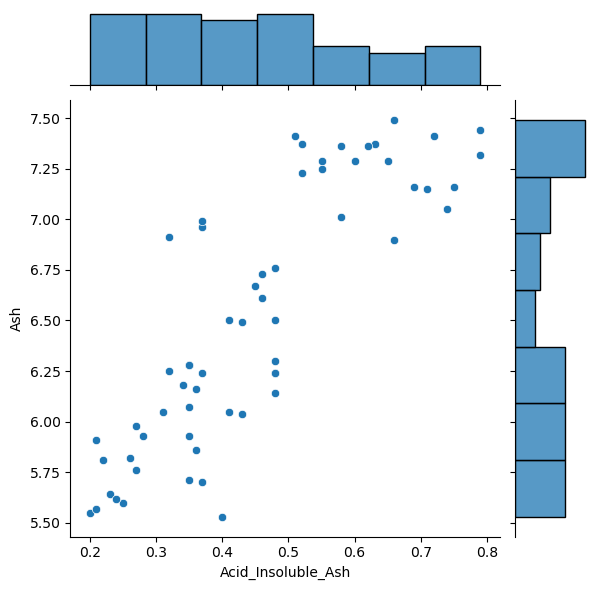

In [50]:
sb.jointplot(x='Acid_Insoluble_Ash',y='Ash',data=data,kind='scatter')

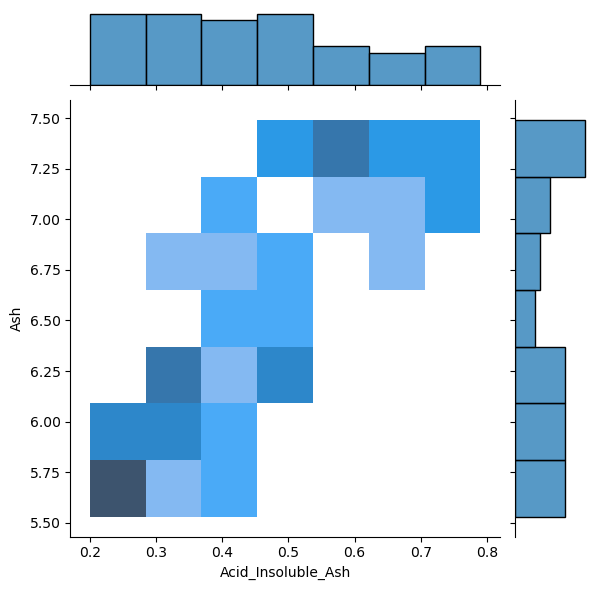

In [52]:
sb.jointplot(x='Acid_Insoluble_Ash',y='Ash',data=data,kind='hist')

In [54]:
data['Quality_Label'].value_counts()

Quality_Label
0    20
1    20
2    20
Name: count, dtype: int64

In [56]:
pd.crosstab(data['Quality_Label'],data['Moisture'])

Moisture,10.03,10.09,10.23,10.27,10.28,10.32,10.44,10.46,10.56,10.65,...,13.14,13.39,13.70,13.71,13.83,13.86,13.87,13.88,13.91,13.93
Quality_Label,,,,,,,,,,,,,,,,,,,,,
0,1,1,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,2


In [57]:
pd.crosstab(data['Moisture'],data['Quality_Label'])

Quality_Label,0,1,2
Moisture,,,
10.03,1,0,0
10.09,1,0,0
10.23,2,0,0
10.27,1,0,0
10.28,1,0,0
10.32,1,0,0
10.44,1,0,0
10.46,1,0,0
10.56,1,0,0
